<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [3]:
# Import necessary libraries
import torch 
from torch import nn 
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm.auto import tqdm


In [5]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [7]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
start = 0
end = 1 
step = 0.01
X = torch.arange(start, end, step)
y = weight * X + bias 

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [8]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [12]:
# Plot the training and testing data 
def plot_predictions(X_train=X_train, 
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x=X_train, y=y_train, c='b', s=8, label='Training Data')
    plt.scatter(x=X_test, y=y_test, c='g', s=8, label='Testing Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Training & Testing data')
    if predictions is not None:
        plt.scatter(x=X_test, y=predictions, c='r', s=8, label='Predictions')
    plt.legend()

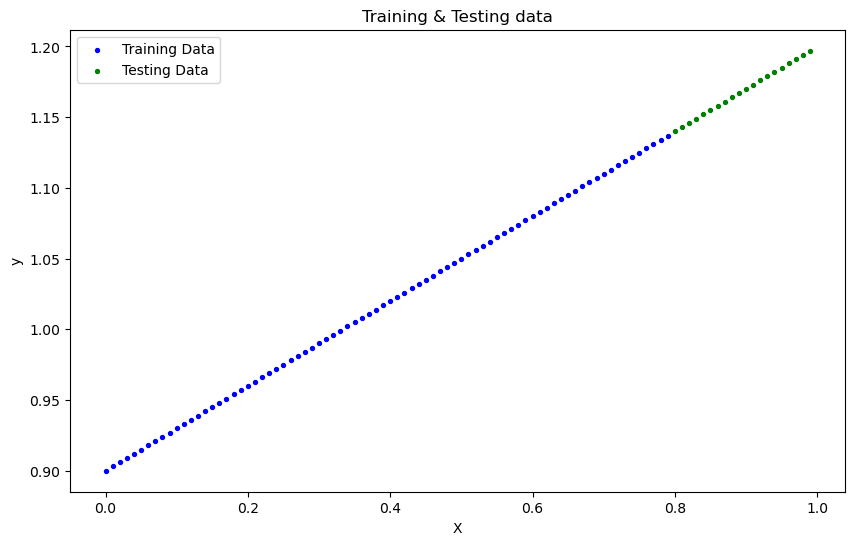

In [13]:
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [168]:
# Create PyTorch linear regression model by subclassing nn.Module
torch.manual_seed(42)
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weights * x + self.bias

In [169]:
obj = LR()
obj.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [170]:
# Instantiate the model and put it to the target device
# Let's send the model to the device
obj.to(device)
next(obj.parameters()).device

device(type='cuda', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [177]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=obj.parameters(), lr=0.001)

In [172]:
# Track Loss History
train_losses = []
test_losses = []
epoch_counts = []


In [178]:
# Training loop

# Train model for 300 epochs
epochs = 200

# Send data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    ### Training

    # Put model in train mode
    obj.train()
  

    # 1. Forward pass
    train_preds = obj(X_train)

    # 2. Calculate loss
    train_loss = loss_fn(train_preds, y_train)
    train_losses.append(train_loss.item())

    # 3. Zero gradients
    optimizer.zero_grad()
  
    # 4. Backpropagation
    train_loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    obj.eval()
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes not needed
        # 1. Do the forward pass in testing mode 
        test_preds = obj(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_preds, y_test)
        test_losses.append(test_loss.item())
  
    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")
        # Print out model state_dict()
        print(f"weight: {obj.state_dict()['weights']} | bias: {obj.state_dict()['bias']}")

Epoch: 0 | Train loss: 0.004 | Test loss: 0.010
weight: tensor([0.3219], device='cuda:0') | bias: tensor([0.8908], device='cuda:0')
Epoch: 20 | Train loss: 0.004 | Test loss: 0.009
weight: tensor([0.3185], device='cuda:0') | bias: tensor([0.8922], device='cuda:0')
Epoch: 40 | Train loss: 0.003 | Test loss: 0.007
weight: tensor([0.3151], device='cuda:0') | bias: tensor([0.8937], device='cuda:0')
Epoch: 60 | Train loss: 0.002 | Test loss: 0.006
weight: tensor([0.3116], device='cuda:0') | bias: tensor([0.8951], device='cuda:0')
Epoch: 80 | Train loss: 0.002 | Test loss: 0.004
weight: tensor([0.3082], device='cuda:0') | bias: tensor([0.8965], device='cuda:0')
Epoch: 100 | Train loss: 0.001 | Test loss: 0.002
weight: tensor([0.3048], device='cuda:0') | bias: tensor([0.8980], device='cuda:0')
Epoch: 120 | Train loss: 0.000 | Test loss: 0.001
weight: tensor([0.3014], device='cuda:0') | bias: tensor([0.8994], device='cuda:0')
Epoch: 140 | Train loss: 0.000 | Test loss: 0.001
weight: tensor([0.

Text(0.5, 1.0, 'Train vs Test Loss')

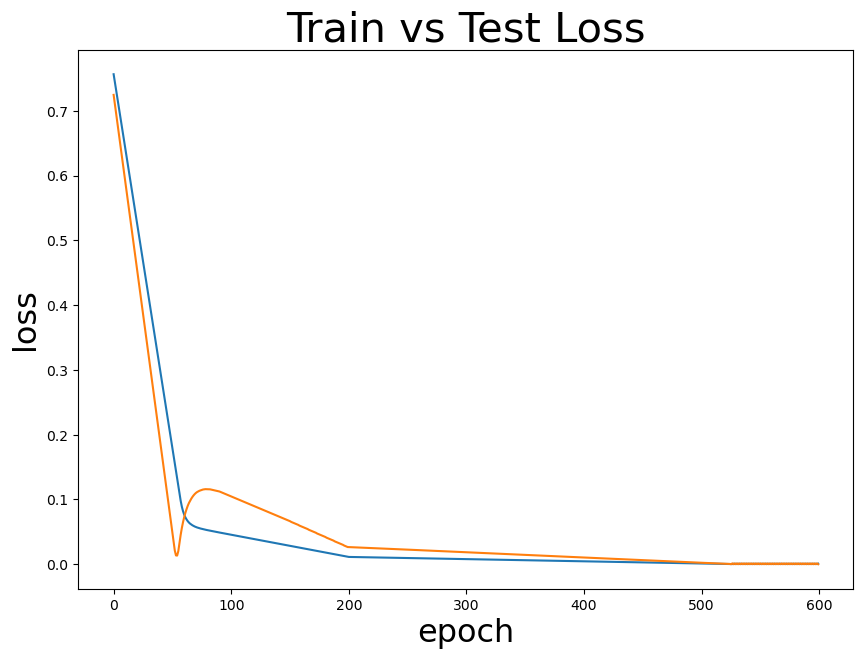

In [179]:
plt.figure(figsize=(10, 7))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.xlabel('epoch', size=23)
plt.ylabel('loss', size=23)
plt.title('Train vs Test Loss', size=30)

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [180]:
# Make predictions with the model
obj.eval()
with torch.inference_mode():
    preds = obj(X_test)
preds[:10]

tensor([1.1399, 1.1429, 1.1459, 1.1489, 1.1519, 1.1550, 1.1580, 1.1610, 1.1640,
        1.1670], device='cuda:0')

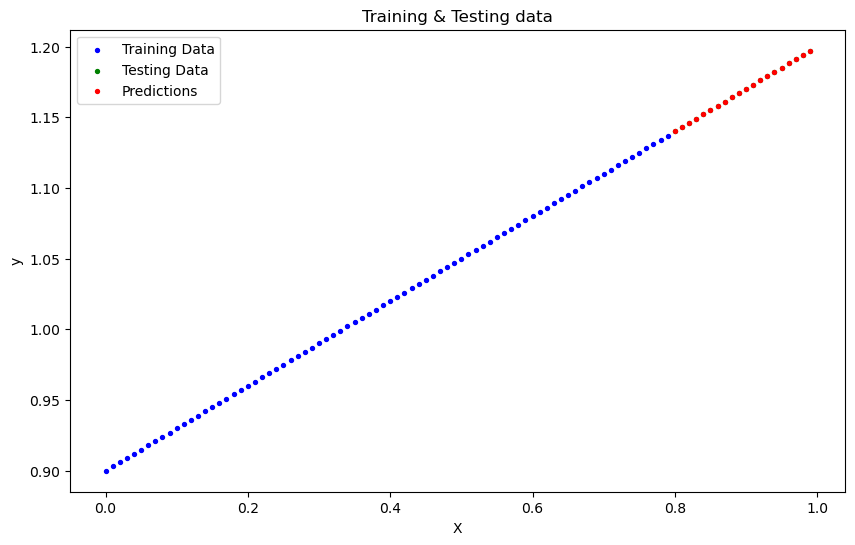

In [181]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=preds.cpu().numpy())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [182]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = '01_pytorch_workflow_exercise_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=obj.state_dict(),f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_exercise_0.pth


In [183]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LR()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

C:\Users\yashs\AppData\Local\Temp\ipykernel_8764\1928575674.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.3005])), ('bias', tensor([0.8995]))])

In [184]:
# Send the loaded model to device
next(loaded_model.parameters()).device

device(type='cpu')

In [185]:
loaded_model.to(device)
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [186]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)
loaded_preds == preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')

In [187]:
loaded_preds

tensor([1.1399, 1.1429, 1.1459, 1.1489, 1.1519, 1.1550, 1.1580, 1.1610, 1.1640,
        1.1670, 1.1700, 1.1730, 1.1760, 1.1790, 1.1820, 1.1850, 1.1880, 1.1910,
        1.1940, 1.1970], device='cuda:0')

In [188]:
preds

tensor([1.1399, 1.1429, 1.1459, 1.1489, 1.1519, 1.1550, 1.1580, 1.1610, 1.1640,
        1.1670, 1.1700, 1.1730, 1.1760, 1.1790, 1.1820, 1.1850, 1.1880, 1.1910,
        1.1940, 1.1970], device='cuda:0')